In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sc

In [5]:
def CauchyProblem(F, x0, y0, x):
    N = x.size-1
    N0 = round(N*(x0-x[0])/(x[-1]-x[0]))
    x = x + (x0-x[N0])
    y = np.zeros(N+1)
    y[N0] = y0
    yp = sc.odeint(F, y0, x[N0:])
    yn = sc.odeint(F, y0, x[N0::-1])
    y = np.concatenate( ( yn.flatten()[:0:-1], yp.flatten() ) )
    return (x,y)  

# Užduotis

Diferencialų lygties $P(x,y)dx+Q(x,y)dy=0$ krypčių laukas yra apibrėžiamas liestinių $P(\tilde{x},\tilde{y})(x-\tilde{x})+Q(\tilde{x},\tilde{y})(y-\tilde{x})$ kryptinėmis atkarpomis (ar vektoriais) įvairiuose taškuose $(\tilde{x},\tilde{y})$. Diferencialų lygties krypčių laukui prasmingos yra ir vertikalios kryptys. Diferencialų lygtyje lengviau išvengti singuliarumų ar kitų neapibrėžtumų.

Parašykite Python'u procedūrą diferencialų lygties, užduotomis funkcijomis $P(x,y)$ ir $Q(x,y)$, krypties lauko braižymui. Patikrinkite, ar iš tikrųjų nebraižote ortogonalaus lauko $\big(P(x,y),Q(x,y)\big)$.

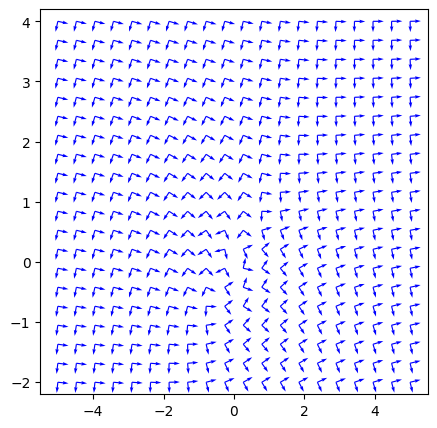

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def foo(P, Q, xs, xe, ys, ye, N):
    X = np.linspace(xs, xe, N)
    Y = np.linspace(ys, ye, N)
    XS, YS = np.meshgrid(X, Y)

    PS = P(XS, YS)
    QS = Q(XS, YS)

    LS = np.sqrt(PS ** 2 + QS ** 2)

    plt.figure( figsize=(5,5) )
    plt.quiver(XS, YS, QS / LS, -PS / LS, color="blue")
    plt.quiver(XS, YS, PS / LS, QS / LS, color="blue")

    XM = np.linspace(xs, xe, 2 * N)
    
    # plt.plot( 
    #     *CauchyProblem(lambda y, x: -P(x, y) / Q(x, y), 4, 4, XM), 
    #     color="red")
    
    plt.ylim([ys - 0.2, ye + 0.2])
    plt.show()

    return PS

a = foo(
    lambda x, y: x**2 + y**2, 
    lambda x, y: x - y, 
    -5, 5, -2, 4, 20)

    